<a href="https://colab.research.google.com/github/rahulchavan424/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

## **Loading Dataset and Importing Libraries/Modules**

In [1]:
#importing libraries/modules
import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from datetime import datetime
import datetime as dt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#loading dataset from drive
bike_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Team Capstone Projects/Bike Sharing Demand Prediction - Rahul Chavan/Data & Resources/SeoulBikeData.csv',encoding='latin')

## **Understanding the Data**

In [4]:
#viewing first 5 rows of the data
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
#shape of data
bike_df.shape

(8760, 14)

In [6]:
#features in dataset
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [7]:
#details on the dataset
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
#checking missing values
bike_df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [9]:
#descriptive summary of dataset
bike_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [10]:
#date format conversion
bike_df['Date']=pd.to_datetime(bike_df['Date'])

In [11]:
#extracting day of week, weekdays, weekend sorting
bike_df['Date']=pd.to_datetime(bike_df['Date'])
bike_df['month']=bike_df['Date'].apply(lambda x:x.month)
bike_df['day_of_week']=bike_df['Date'].dt.day_name()
bike_df['weekdays_weekend']=bike_df['day_of_week'].apply(lambda x:1 if x=='Saturday' or x=='Sunday' else 0)
bike_df=bike_df.drop(columns=['Date','day_of_week'],axis=1)

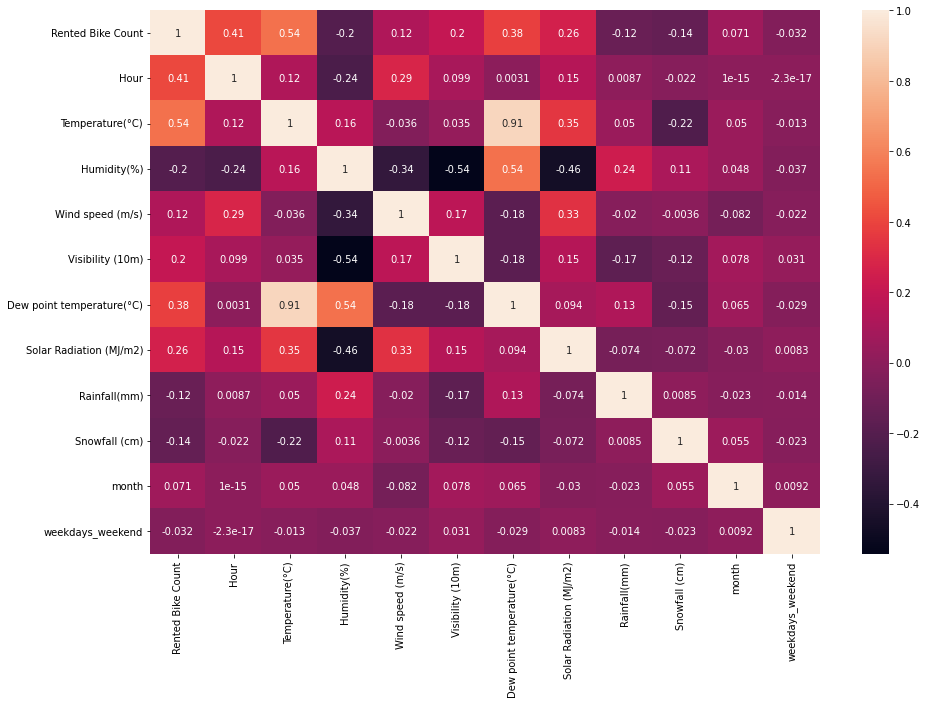

In [12]:
#checking correlation between the variables
plt.figure(figsize=(15,10))
sns.heatmap(bike_df.corr(),annot=True)

In [13]:
#checking multicollinearity between variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  vif=pd.DataFrame()
  vif['variables']=X.columns
  vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
  return(vif)

In [14]:
#calculating vif for required variables
calc_vif(bike_df[[i for i in bike_df.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Hour,4.424147
1,Temperature(°C),34.331857
2,Humidity(%),6.973710
3,Wind speed (m/s),4.835871
4,Visibility (10m),9.309721
5,Dew point temperature(°C),17.758961
6,Solar Radiation (MJ/m2),2.881777
7,Rainfall(mm),1.082987
8,Snowfall (cm),1.125842
9,month,4.690212


In [15]:
#dropping the dew point temperature feature
bike_df=bike_df.drop(['Dew point temperature(°C)'],axis=1)

### **Key Observations-1**
*   From the above correlation heatmap and VIF, we can see that there is a positive correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column it would not affect the outcome of our analysis. Hence, we can drop the column 'Dew point temperature(°C)'



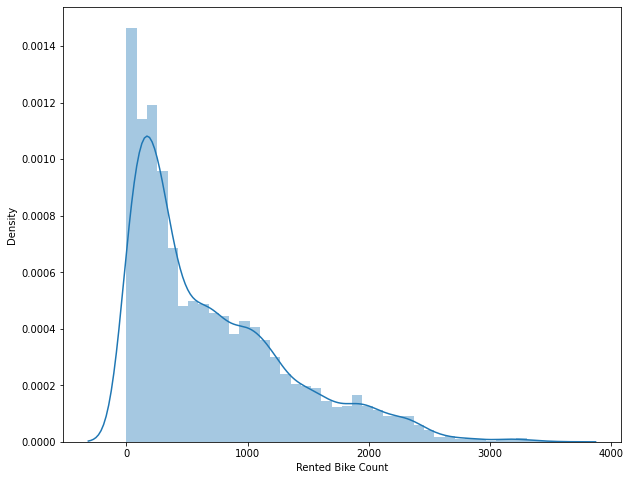

In [16]:
#visualizing distribution of rented bike count
plt.figure(figsize=(10,8))
sns.distplot(bike_df['Rented Bike Count'])

In [17]:
#extracting numeric features in dataset
numeric_features=bike_df.select_dtypes(exclude='object')

In [18]:
#viewing numerical features
numeric_features.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,1,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,1,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,1,0


In [19]:
#descriptive summary of numeric features
numeric_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80
month,8760.0,6.526027,3.448048,1.0,4.00,7.00,10.00,12.00


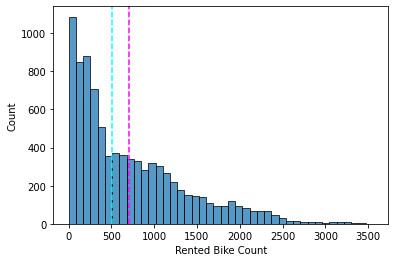

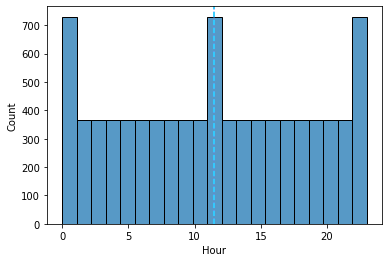

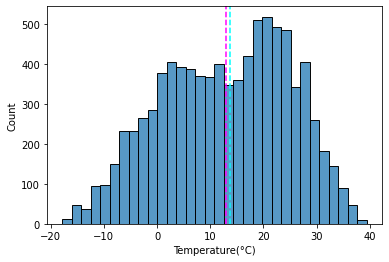

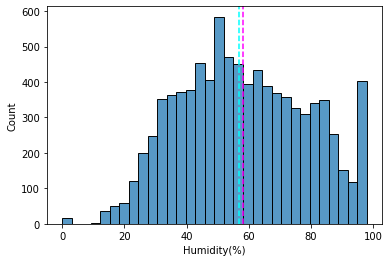

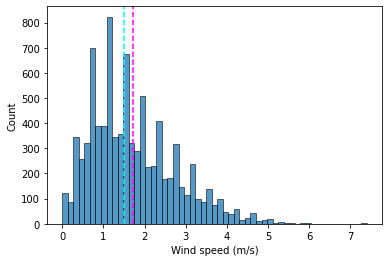

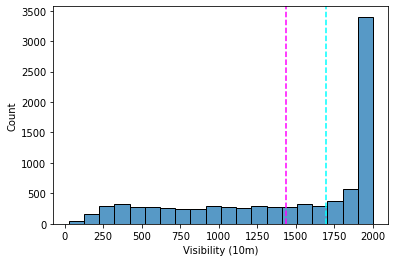

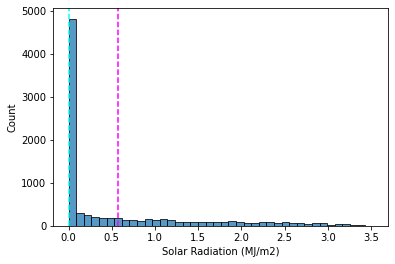

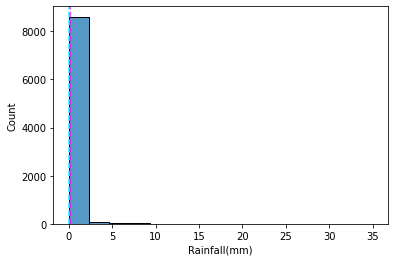

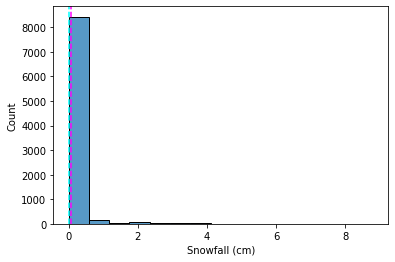

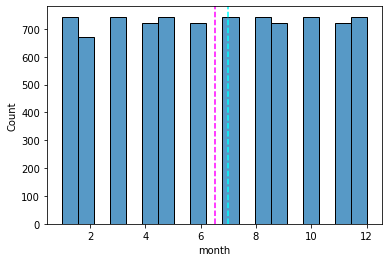

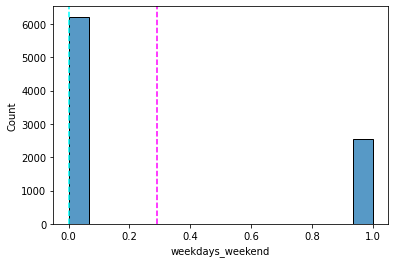

In [20]:
#plotting histogram with mean and median vertical lines for each numeric feature
for col in numeric_features[:]:
  sns.histplot(bike_df[col])
  plt.axvline(bike_df[col].mean(),color='magenta',linestyle='dashed')
  plt.axvline(bike_df[col].median(),color='cyan',linestyle='dashed')
  plt.show()

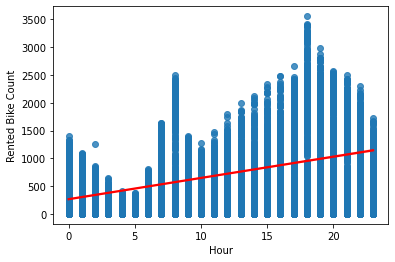

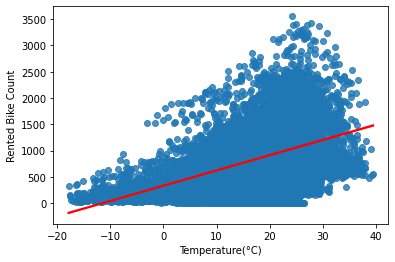

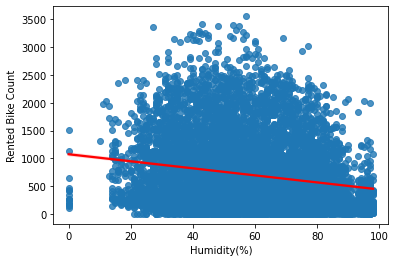

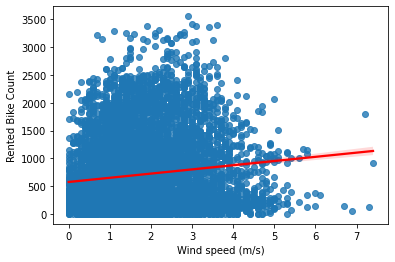

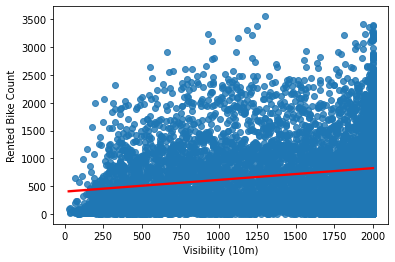

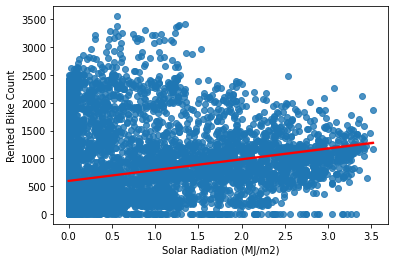

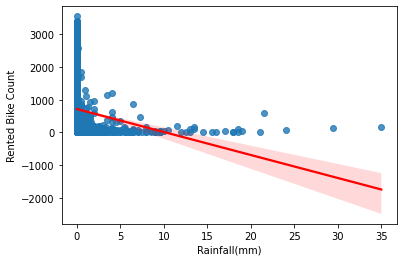

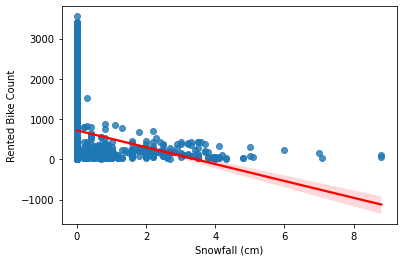

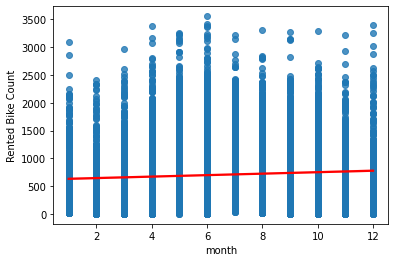

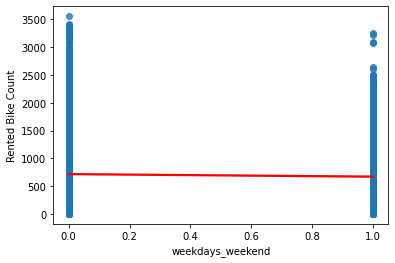

In [21]:
#plotting regression plot of each feature against rented bike count
for col in numeric_features[:]:
  if col=='Rented Bike Count':
    pass
  else:
    sns.regplot(x=bike_df[col],y=bike_df['Rented Bike Count'],line_kws={'color':'red'})
  plt.show()

In [22]:
#extracting categorical features in dataset
categorical_features=bike_df.select_dtypes(include='object')

In [23]:
#viewing categorical features
categorical_features.head()

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes


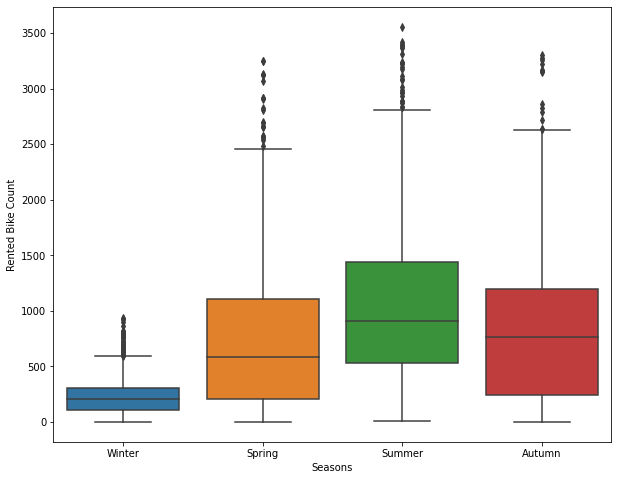

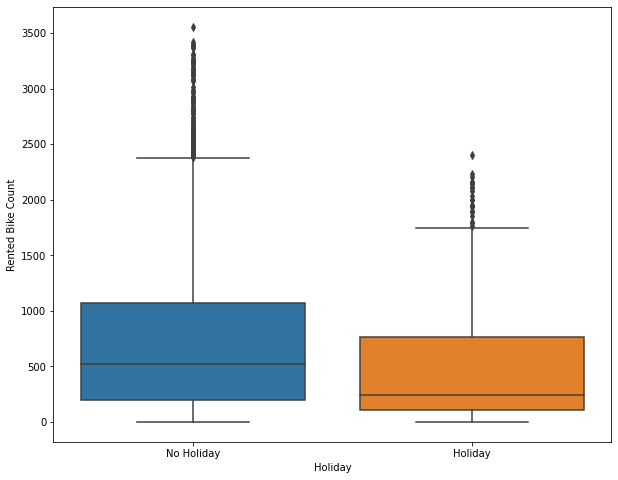

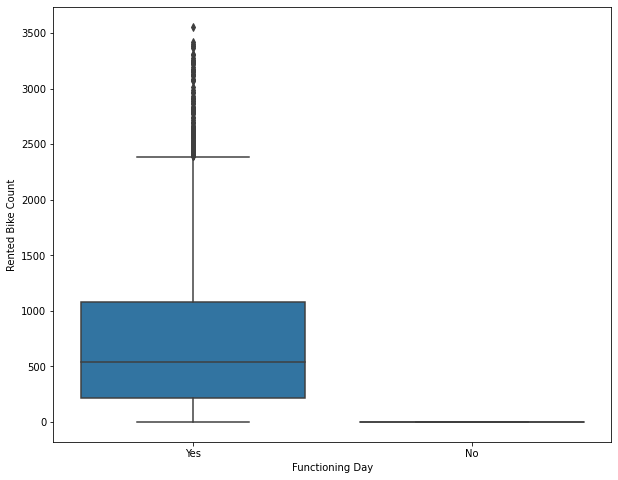

In [24]:
#plotting box plot for categorical features
for col in categorical_features:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=bike_df[col],y=bike_df['Rented Bike Count'])
  plt.show()

### **Key Observations-2**
*   There is lower demand in winter seasons
*   There is higher demand during non holidays
*   There is no demand on non functioning days




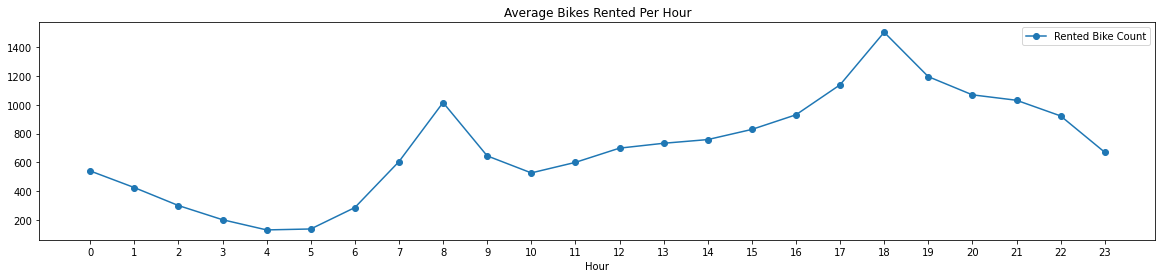

In [25]:
#plotting line graph for average bikes rented per hour
avg_rent_hrs=bike_df.groupby('Hour')['Rented Bike Count'].mean()
plt.figure(figsize=(20,4))
a=avg_rent_hrs.plot(legend=True,marker='o',title='Average Bikes Rented Per Hour')
a.set_xticks(range(len(avg_rent_hrs)));
a.set_xticklabels(avg_rent_hrs.index.tolist());

### **Key Observations-3**
*   There is higher rented bike demand from 8am to 9pm
*   The demand rises most at 8am and 6pm which are the prime office opening and closing times



In [26]:
#creating dummy variables for categorical features
dummy_categorical_features=pd.get_dummies(categorical_features,drop_first=True)

In [27]:
#viewing first 5 rows of dummy categorical features
dummy_categorical_features.head()

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,0,0,1,1,1
1,0,0,1,1,1
2,0,0,1,1,1
3,0,0,1,1,1
4,0,0,1,1,1


In [28]:
#combining numeric features and dummy categorical features to form final dataframe
final_bike_df=pd.concat([dummy_categorical_features,numeric_features],axis=1)

In [29]:
#viewing first 5 rows of final dataframe
final_bike_df.head()

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,weekdays_weekend
0,0,0,1,1,1,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,0
1,0,0,1,1,1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0
2,0,0,1,1,1,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,1,0
3,0,0,1,1,1,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,1,0
4,0,0,1,1,1,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,1,0


In [30]:
#descriptive summary of final dataframe
final_bike_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Seasons_Spring,8760.0,0.252055,0.434217,0.0,0.00,0.00,1.00,1.00
Seasons_Summer,8760.0,0.252055,0.434217,0.0,0.00,0.00,1.00,1.00
Seasons_Winter,8760.0,0.246575,0.431042,0.0,0.00,0.00,0.00,1.00
Holiday_No Holiday,8760.0,0.950685,0.216537,0.0,1.00,1.00,1.00,1.00
Functioning Day_Yes,8760.0,0.966324,0.180404,0.0,1.00,1.00,1.00,1.00
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40


## **Train | Test Split For Regression**

In [31]:
#seperating the dependent and independent variables
X=final_bike_df.drop(['Rented Bike Count'],axis=1)
y=final_bike_df['Rented Bike Count']

In [32]:
#splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [33]:
#scaling the data
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)

## **Linear Regression**

In [34]:
#importing linear regression
from sklearn.linear_model import LinearRegression

In [35]:
#linear model
linear_model=LinearRegression()

In [36]:
#fitting training data in linear model
linear_model.fit(X_train,y_train)

LinearRegression()

In [37]:
#predicted values by linear model
y_pred1=linear_model.predict(X_test)

In [38]:
#MSE
mse1=mean_squared_error(y_test,y_pred1)
mse1

184530.73065054038

In [39]:
#RMSE
rmse1=np.sqrt(mse1)
rmse1

429.5704024377615

In [40]:
#R2 score
r2_score1=r2_score(y_test,y_pred1)
r2_score1

0.5511656258979868

In [41]:
#adjusted R2 score
adj_r2_score1=1-(1-r2_score1)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
adj_r2_score1

0.5480687925900152

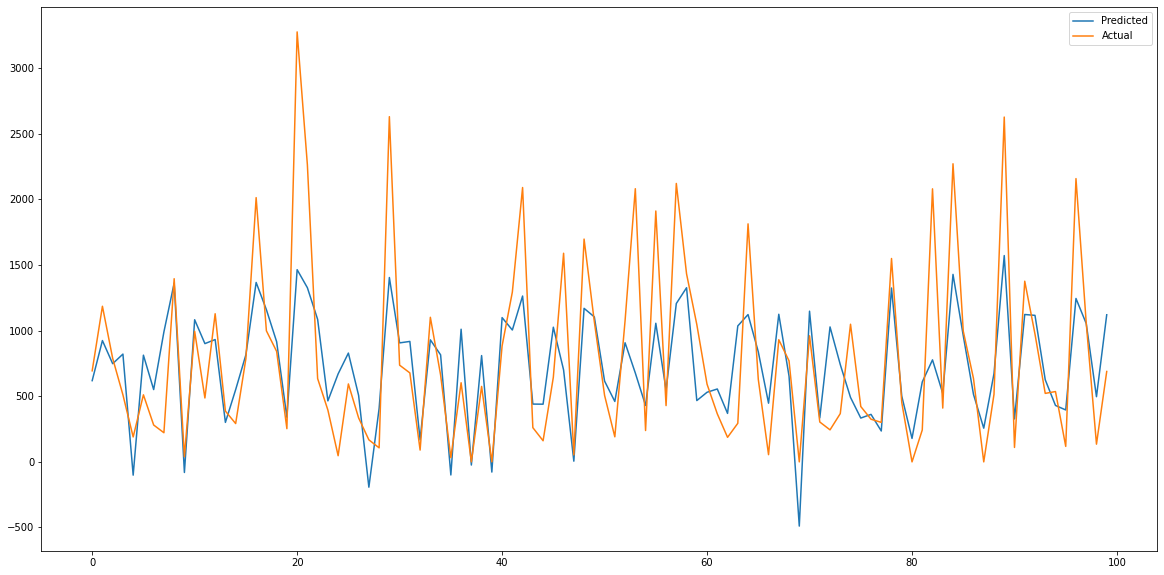

In [42]:
#plotting and visualizing the linear model
plt.figure(figsize=(20,10))
plt.plot(y_pred1[:100])
plt.plot(np.array(y_test[:100]))
plt.legend(['Predicted','Actual'])
plt.show()

## **Lasso Regression**

In [43]:
#importing lasso regression
from sklearn.linear_model import Lasso

In [44]:
#lasso model
lasso_model=Lasso()

In [45]:
#finding best parameters for lasso by gridsearchcv
parameters={'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_grid=GridSearchCV(lasso_model,parameters,scoring='neg_mean_squared_error',cv=5)

In [46]:
#fitting training data in lasso grid
lasso_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [47]:
#predicted values by lasso grid
y_pred2=lasso_grid.predict(X_test)

In [48]:
#MSE
mse2=mean_squared_error(y_test,y_pred2)
mse2

184539.4888822193

In [49]:
#RMSE
rmse2=np.sqrt(mse2)
rmse2

429.58059649176346

In [50]:
#R2 score
r2_score2=r2_score(y_test,y_pred2)
r2_score2

0.5511443232378825

In [51]:
#adjusted R2 score
adj_r2_score2=1-(1-r2_score2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
adj_r2_score2

0.5480473429474355

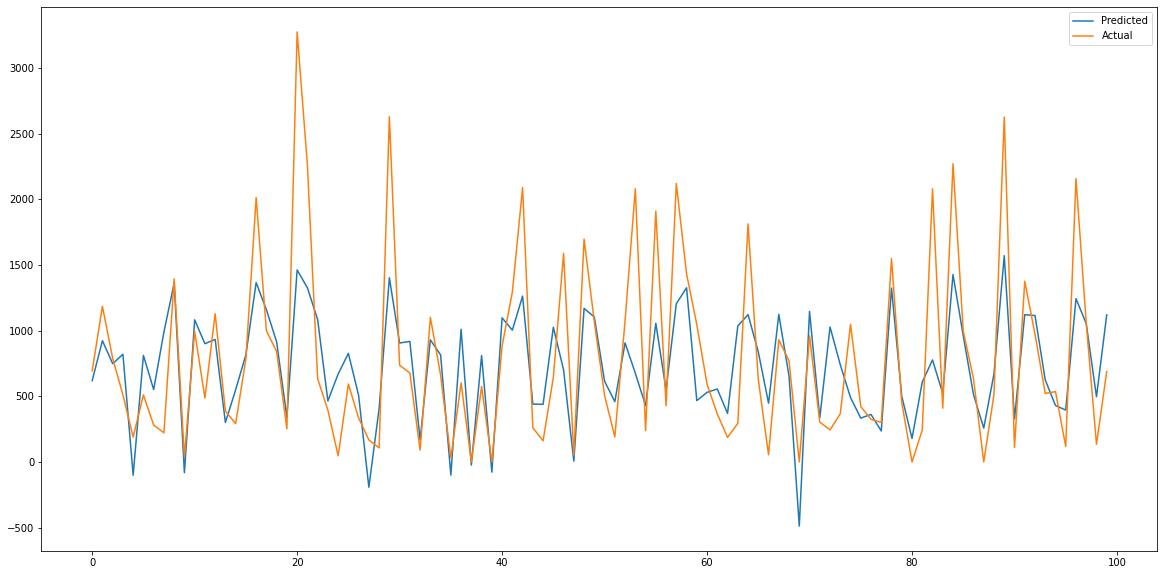

In [52]:
#plotting and visualizing the lasso model
plt.figure(figsize=(20,10))
plt.plot(y_pred2[:100])
plt.plot(np.array(y_test[:100]))
plt.legend(['Predicted','Actual'])
plt.show()

## **Ridge Regression**

In [53]:
#importing ridge regression
from sklearn.linear_model import Ridge

In [54]:
#ridge model
ridge=Ridge()

In [55]:
#finding best parameters for ridge by gridsearchcv
parameters={'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=3)

In [56]:
#fitting training data in ridge grid
ridge_grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55,
                                   60, 100, 0.5, 1.5, 1.6, 1.7, 1.8, 1.9]},
             scoring='neg_mean_squared_error')

In [57]:
#predicted values by ridge grid
y_pred3=ridge_grid.predict(X_test)

In [58]:
#MSE
mse3=mean_squared_error(y_test,y_pred3)
mse3

184540.3500457164

In [59]:
#RMSE
rmse3=np.sqrt(mse3)
rmse3

429.5815988211278

In [60]:
#R2 score
r2_score3=r2_score(y_test,y_pred3)
r2_score3

0.5511422286286114

In [61]:
#adjusted R2 score
adj_r2_score3=1-(1-r2_score3)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
adj_r2_score3

0.5480452338859385

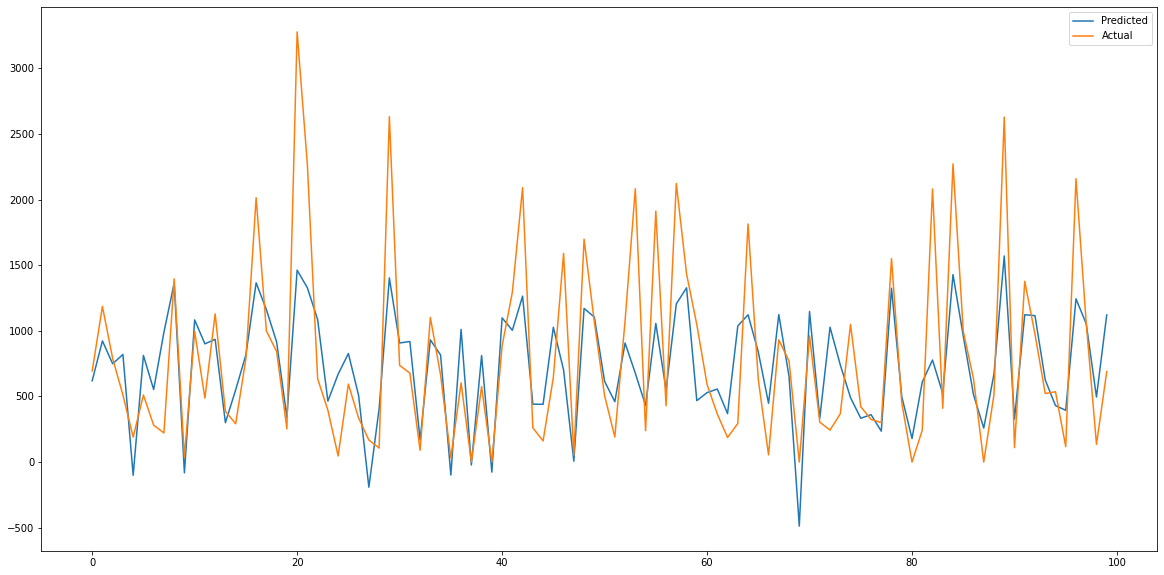

In [62]:
#plotting and visualizing the lasso model
plt.figure(figsize=(20,10))
plt.plot(y_pred3[:100])
plt.plot(np.array(y_test[:100]))
plt.legend(['Predicted','Actual'])
plt.show()